# CSCi 5512 : Artificial Intelligence II - Assignment 4
<font color='red'> Due Date: April 09, 2021 </font>

## Instructions
1. It is an individual assignment. You are allowed/encouraged to talk to others but it must be your own work.
2. This assignment has both written and programming problems.
3. Show your work. Submissions without explanation or steps to arrive at the answer will NOT receive full credit.
4. Submit the notebook after successfuly running the code. We should be able to see your results. 
5. Programming language: Python 3; Allowed packages: numpy, pandas, pytorch. No other packages are allowed.

## Topics in this assignment
* MDPs (Refer the lecture video links)

### Problem 1 : VPI (20 Points)
This question considers the value of perfect information (VPI) $VPI(E_j)$ which evaluates the value of additional information $E_j$ at network node $j$ given existing information $E$.

a. Show that VPI is non-negative, i.e., $VPI(Ej) ≥ 0$, for any choice of $j$ and $E$.  **(8 points)**

Expected utility of the current best action $\alpha$, given the evidence $e$, is defined as:
\begin{align*}
    EU(\alpha|e) &= \text{max}_a \sum_{s^{\prime}}P(Result(a)=s^{\prime}|a,e)U(s^{\prime}),
\end{align*}
where $Result(a)$ is the function which returns the state after taking the action $a$, $U(s^{\prime})$ is the utility value of state $s^{\prime}\in \mathcal{S}$, where $\mathcal{S}$ is the set of all possible states. The value of new best action, after the new evidence $E_j=e_j$ is obtained, is given by:
\begin{align*}
    EU(\alpha_{e_j}|e,e_j) &= \text{max}_a \sum_{s^{\prime}} P(Result(a)=s^{\prime}|a,e,e_j)U(s^{\prime}).
\end{align*}
As $E_j$ is a random variable, whose value is currently unknown, to determine the value of obtaininng the information $E_j$, we need average over all possible values of $E_j$. Therefore, the VPI is defined as follows:
\begin{align*}
    VPI(E_j) &= \left(\sum_k P(E_j = e_{jk}|e)EU(\alpha_{e_{jk}}|e, E_j=e_{jk})\right)-EU(\alpha|e).
\end{align*}
Now, consider two scenarios that may arise after obtaining the information $E_j$.<br>
case 1: If the agent takes the same action $\alpha$ after obtaining $E_j$, then
\begin{align*}
    VPI(E_j) &= \left(\sum_k P(E_j=e_{jk}|e)EU(\alpha|e, E_j=e_{jk})\right)-EU(\alpha|e)\\
    &= \left(\sum_k EU(\alpha,E_j=e_{jk}|e)\right)-EU(\alpha|e)\\
    &= EU(\alpha|e)-EU(\alpha|e)\\
    &= 0.
\end{align*}
case 2:
If the agent does not take action $\alpha$, and instead takes some other action $\alpha_{e_{jk}}$, then by definition of expected utility,
\begin{align*}
    EU(\alpha_{e_{jk}}|e,E_j=e_{jk}) \geq EU(\alpha|e,E_j=e_{jk}),
\end{align*}
because of the $\text{max}$ operator in the definition of expected utility. Therefore,
\begin{align*}
    VPI(E_j) \geq 0.
\end{align*}

b. Show that VPI is order independent. Given two pieces of information, the value of both is independent of the order that it comes in. **(12 points)**

We denote $VPI_e(E_j)$ as the VPI of obtaining the information $E_j$ given the already acquired evidence $e$. Therefore,
\begin{align*}
    VPI_{e}(E_j,E_k) &= \sum_m \sum_l \left(P(E_k=e_{kl}, E_j=e_{jm}|e)\text{max}_a\left(\sum_{s^{\prime}}P(s^{\prime}|a,e,E_k=e_{kl},E_j=e_{jm})U(s^{\prime})\right)\right)-EU(\alpha|e)\\
    &= \sum_m \sum_l \left(P(E_k=e_{kl}|e,E_j=e_{jm})P(E_j=e_{jm}|e)\text{max}_a\left(\sum_{s^{\prime}}P(s^{\prime}|a,e,E_k=e_{kl},E_j=e_{jm})U(s^{\prime})\right)\right)-EU(\alpha|e)\\
    &= \sum_m P(E_j=e_{jm}|e)\left(\sum_l P(E_k=e_{kl}|e,E_j=e_{jm})\text{max}_a\left(\sum_{s^{\prime}}P(s^{\prime}|a,e,E_k=e_{kl},E_j=e_{jm})U(s^{\prime})\right)\right)-EU(\alpha|e)\\
    &= \sum_m P(E_j=e_{jm}|e)\left(VPI_{e,e_j}(E_k)+\text{max}_a \sum_{s^{\prime}}P(s^{\prime}|a,e,E_j=e_{jm})U(s^{\prime})\right)-EU(\alpha|e)\\
    &= \sum_m \left(VPI_{e,e_j}(E_k)P(E_j=e_{jm}|e)\right)+\sum_m \left(P(E_j=e_{jm}|e)\text{max}_a \sum_{s^{\prime}}P(s^{\prime}|a,e,E_j=e_{jm})U(s^{\prime})\right)-EU(\alpha|e)\\
    &= VPI_{e,e_j}(E_k) + VPI_{e}(E_j)
\end{align*}
Similarly, we can prove the following:
\begin{align*}
    VPI_{e}(E_j,E_k) &= \sum_m \sum_l \left(P(E_k=e_{kl}, E_j=e_{jm}|e)\text{max}_a\left(\sum_{s^{\prime}}P(s^{\prime}|a,e,E_k=e_{kl},E_j=e_{jm})U(s^{\prime})\right)\right)-EU(\alpha|e)\\
    &= \sum_m \sum_l \left(P(E_j=e_{jm}|e,E_k=e_{kl})P(E_k=e_{kl}|e)\text{max}_a\left(\sum_{s^{\prime}}P(s^{\prime}|a,e,E_k=e_{kl},E_j=e_{jm})U(s^{\prime})\right)\right)-EU(\alpha|e)\\
    &= \sum_l P(E_k=e_{kl}|e)\left(\sum_m P(E_j=e_{jm}|e,E_k=e_{kl})\text{max}_a\left(\sum_{s^{\prime}}P(s^{\prime}|a,e,E_k=e_{kl},E_j=e_{jm})U(s^{\prime})\right)\right)-EU(\alpha|e)\\
    &= \sum_l P(E_k=e_{kl}|e)\left(VPI_{e,e_k}(E_j)+\text{max}_a \sum_{s^{\prime}}P(s^{\prime}|a,e,E_k=e_{kl})U(s^{\prime})\right)-EU(\alpha|e)\\
    &= \sum_l \left(VPI_{e,e_k}(E_j)P(E_k=e_{kl}|e)\right)+\sum_l \left(P(E_k=e_{kl}|e)\text{max}_a \sum_{s^{\prime}}P(s^{\prime}|a,e,E_k=e_{kl})U(s^{\prime})\right)-EU(\alpha|e)\\
    &= VPI_{e,e_k}(E_j) + VPI_{e}(E_k)
\end{align*}
Therefore,
\begin{align*}
    VPI_{e}(E_j,E_k) &= VPI_{e,ej}(E_k)+VPI_{e}(E_j) = VPI_{e,e_k}(E_j)+VPI_{e}(E_k).
\end{align*}
Hence VPI is order independent.

### Problem 2: MDP (40 Points)
Consider a Markov Decision Process (MDP) with state transitions and utilities as shown in fig 1. In particular, the state transitions occur as follows: for an attempted action to move in a certain direction, the move is successful with probability
0.7, with probability 0.15 the agent lands in the state to the left, and with probability 0.15 the agent lands in the state to the right (fig 1a).

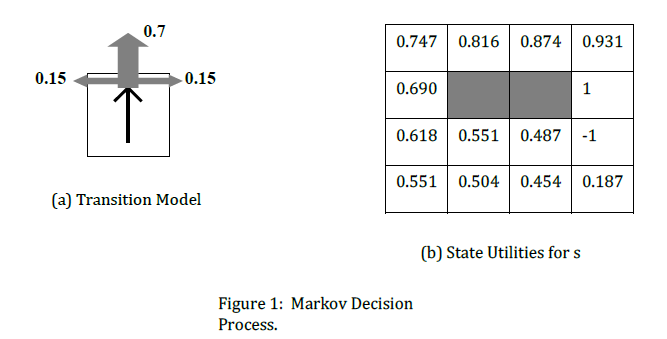

a. Define the expected value of a state in a MDP. How is a general policy (not necessarily optimal) related to the (value function)? Explain using an appropriate equation. **(10 points)**

In MDP, the expected value of a state $s$ is defined as the expected reward obtained by starting from $s$. The following equation describes the expected state value:
\begin{align*}
    v(s) &= E\left[\sum_{t=0}^{\infty}\gamma^t R(S_{t+1})|S_0=s\right],
\end{align*}
where $\gamma^t \in [0,1]$ is the discount factor at step $t$, $S_t$ (a random variable) is the state at step $t$, and $R(S_t)$ is the reward obtained from $S_t$.<br>
A policy, $\pi$, is defined as a distribution over actions given the states. Formally, it can be defined as follows:
\begin{align*}
    \pi(a|s) &= P(A_t=a|S_t=s),
\end{align*}
where $A_t$ is a random variable denoting the action taken at step $t$, and $a\in\mathcal{A}$, where $\mathcal{A}$ is the set of all possible actions.<br>
The expected value of state, given a policy, is defined as the expected reward obtained by following the policy $\pi$, starting from state $s$.
\begin{align*}
    v_{\pi}(s) &= E_{\pi}\left[\sum_{t=0}^{\infty}\gamma^t R(S_{t+1})|S_0=s\right]\\
    &= E_{\pi}\left[R(s)+\gamma(R(S_{t+1})+\gamma R(S_{t+2})+ \cdots)|S_0=s\right]\\
    &= E_{\pi}\left[R(s)+\gamma v_{\pi}(S_{t+1})|S_0=s\right]\\
    &= R(s)+\gamma \sum_{s^{\prime}\in \mathcal{S}} P(s^{\prime}|s)v_{\pi}(s^{\prime})\\
    &= R(s)+\gamma \sum_{s^{\prime}\in \mathcal{S}} \sum_{a\in \mathcal{A}} P(s^{\prime}|s,a)P(a|s)v_{\pi}(s^{\prime})\\
    &= R(s)+\gamma \sum_{s^{\prime}\in \mathcal{S}} \sum_{a\in \mathcal{A}} P(s^{\prime}|s,a)\pi(a|s)v_{\pi}(s^{\prime})\\
    &= R(s)+\sum_{a\in \mathcal{A}}\pi(a|s)\left(\gamma \sum_{s^{\prime}\in \mathcal{S}}P(s^{\prime}|s,a)v_{\pi}(s^{\prime})\right),
\end{align*}
where $\mathcal{S}$ is the set of all possible states.<br>
Therefore, the expected state value is the current state reward plus sum over all actions that can be taken from state $s$ with the corresponding probabilities, defined by the policy $\pi$, and accumulating the discounted rewards afterwards following the policy.

b. Describe the policy iteration algorithm. Can we bound the error in the policy in policy iteration? Explain **(10 points)**

In policy iteration our objective is to find the policy which maximizes the expected state value for each starting state i.e.
\begin{align*}
    \pi^ * (s) = arg\,max_{\pi}v_{\pi}(s)
\end{align*}
Starting with an initial policy $\pi_0$, at each iteration $i$, the policy iteration algorithm iterates the following two steps until it converges to the maximum:<br>
1. Policy evaluation: Calcualte $v_{\pi_i}(s)$ for each state $s\in \mathcal{S}$<br>
2. Policy improvement: Calculate new policy $\pi_{i+1}$ that maximizes expected state value using one-step look ahead based on $v_{\pi_i}(s)$ i.e. if $\text{max}_a \sum_{s'}P(s'|s,a)v_{\pi}(s') > \sum_{s'}P(s'|s,\pi(s))v(s')$. then update the policy $\pi(s) = \text{argmax}_a \sum_{s'}P(s'|s,a)v(s')$<br>
Therefore, at each iteration, we calculate the state values as per the current policy, and then look at which action would result into higher state values from a certain state and then update the current policy with that action.<br> 
Policy iteration is guaranteed to converge, and upon convergence, the policy and its corresponding state value function are the optimal policy and optimal state value function.<br>
At max, we can have $n(\mathcal{A})^{n(\mathcal{S})}$ number of policies, where $n(\mathcal{A})$ is the total number of actions and $n(\mathcal{S})$ is the total number of states. In every iteration, we improve the policy which means, we encounter a particular policy only once. Therefore, in worst case, after $n(\mathcal{A})^{n(\mathcal{S})}$ number of iterations (i.e. iterating through all the policies) the algorithm must converge.<br>
Now, at convergence,
\begin{align*}
    \pi^ * (s) &= \text{max}_{a\in \mathcal{A}} \sum_{s^{prime}\in \mathcal{S}} P(s^{\prime}|s,a)v_{\pi^ * }(s^{\prime}),
\end{align*}
which is the Bellman equation. Therefore, $v_{\pi^ *}$ is a solution of the Bellman equation and hence it is the optimal state value function and $\pi^ * $ is the optimal policy.

c. Using the optimal utilities given in Figure 1b, compute the optimal policy for the MDP. Is the optimal policy the same as trying to move to the highest utility neighbor? Explain why/why not. **(10 points)**

The following code computes the optimal policy

In [1]:
#######################################################################
# IMPORTS
#######################################################################
import numpy as np
#######################################################################
# Constants
#######################################################################
forward = 1 # Just init value. forward=1 means up movement along rows, -1 means down movement
side = 1 # Just init value. side=1 means right movement along columns, -1 means left movement
INVALID_UTILITY = -100. # To denote the greyed out blocks
#######################################################################
# Utility matrix
#######################################################################
U = np.array([[0.551, 0.504, 0.454, 0.187], # (0,0)(bottom-left) to (0,3) of the board in the question
            [0.618, 0.551, 0.487, -1], # (1,0) to (1,3)
            [0.690, INVALID_UTILITY, INVALID_UTILITY, 1], # (2,0) to (2,3)
            [0.747, 0.816, 0.874, 0.931]]) # (3,0) to (3,3)
n_state_row = U.shape[0]
n_state_col = U.shape[1]
end_state = np.array([[1, 3],
                      [2, 3]])
action_state = np.array([[1, 0],
                        [-1, 0],
                        [0, 1],
                        [0, -1]])
#######################################################################
# Function definitions
#######################################################################
#######################################################################
# This function returns the state utility value for an action
#######################################################################
def get_exp_utility_from_action(U, curr_state, action):
    ROW = 0
    COL = 1
    # get forward/backward or left/right movement indicator
    forward = int(action[0])
    side = int(action[1])
    # Form current state
    stay_put_probability = 0.
    stay_put = np.array([curr_state[ROW], curr_state[COL], stay_put_probability])
    # get next state
    next_state_row = curr_state[ROW]+forward
    next_state_col = curr_state[COL]+side
    next_desired = np.array([next_state_row, next_state_col, 0.7])
    # Get spurious transition
    if (0 == side):
        # spurious would be along the col
        next_spurious = np.array([[curr_state[ROW], curr_state[COL]+1, 0.15],
                                  [curr_state[ROW], curr_state[COL]-1, 0.15]])
    else:
        # spurious would be along the rows
        next_spurious = np.array([[curr_state[ROW]+1, curr_state[COL], 0.15],
                                  [curr_state[ROW]-1, curr_state[COL], 0.15]])

    # Check for wall boundary or blocked cell for desired motion
    if ((next_desired[ROW] <0) or (next_desired[COL] < 0) or
            (next_desired[ROW] >= U.shape[0]) or (next_desired[COL] >= U.shape[1]) or
            (INVALID_UTILITY == U[int(next_desired[ROW]), int(next_desired[COL])])):
        next_desired[ROW] = curr_state[ROW]
        next_desired[COL] = curr_state[COL]
        stay_put_probability += next_desired[2]
        next_desired[2] = 0.
    # Check for wall boundary or blocked cell for spurious motion
    for spurious in range(next_spurious.shape[0]):
        if ((next_spurious[spurious, ROW] < 0) or (next_spurious[spurious, COL] < 0) or
                (next_spurious[spurious, ROW] >= U.shape[0]) or (next_spurious[spurious, COL] >= U.shape[1]) or
            (INVALID_UTILITY == U[int(next_spurious[spurious, ROW]), int(next_spurious[spurious, COL])])):
            next_spurious[spurious, ROW] = curr_state[ROW]
            next_spurious[spurious, COL] = curr_state[COL]
            stay_put_probability += next_spurious[spurious, 2]
            next_spurious[spurious, 2] = 0.
    # Update the stay put probability
    stay_put[2] = stay_put_probability
    # Get utility value
    curr_utility = U[int(next_desired[ROW]), int(next_desired[COL])]*next_desired[2]+\
                   U[int(stay_put[ROW]), int(stay_put[COL])]*stay_put[2]+\
                   U[int(next_spurious[0, ROW]), int(next_spurious[0, COL])]*next_spurious[0, 2] +\
                   U[int(next_spurious[1, ROW]), int(next_spurious[1, COL])]*next_spurious[1, 2]
    return curr_utility
#######################################################################
# This function initializes the policy with some random policy
#######################################################################
def initialize_policy(n_state_row, n_state_col):
    policy = np.zeros((n_state_row, n_state_col))
    for row in range(n_state_row):
        for col in range(n_state_col):
            policy[row, col] = np.random.choice(4, size=1)
    return policy
#######################################################################
# This function decodes action number to corresponding action
# up = 0, down = 1, left = 2, right = 3
#######################################################################
def decode_action(action_number):
    action = np.zeros((2,))
    if (0 == int(action_number)):
        action[0] = 1
    elif (1 == int(action_number)):
        action[0] = -1
    elif (2 == int(action_number)):
        action[1] = -1
    elif (3 == int(action_number)):
        action[1] = 1
    return action
#######################################################################
# This function encodes the up, down, left, right movements
# to corresponding codes
# up = 0, down = 1, left = 2, right = 3
#######################################################################
def encode_action(action):
    action_number = 100 # invalid
    if ((1 == action[0]) and (0 == action[1])):
        action_number = 0
    elif ((-1 == action[0]) and (0 == action[1])):
        action_number = 1
    elif ((0 == action[0]) and (-1 == action[1])):
        action_number = 2
    elif ((0 == action[0]) and (1 == action[1])):
        action_number = 3
    return action_number
#######################################################################
# CODE STARTS HERE
#######################################################################
policy = initialize_policy(U.shape[0], U.shape[1])
for row in range(n_state_row):
    for col in range(n_state_col):
        # get current state utility according to the policy
        utility_per_policy = get_exp_utility_from_action(U, [row, col], decode_action(policy[row, col]))
        preferred_action = action_state[0, :]
        utility = 0.
        # get action which maximizes the utility: One step look-ahead
        for action in range(action_state.shape[0]):
            curr_action_utility = get_exp_utility_from_action(U, [row, col], action_state[action, :])
            if (utility < curr_action_utility):
                utility = curr_action_utility
                preferred_action = action_state[action, :]
        # Check if max over all action is greater than the utility based on policy action
        if (utility > utility_per_policy):
            policy[row, col] = encode_action(preferred_action)
#######################################################################
# Print output
#######################################################################
print('action code: 0=up, 1=down, 2=left, 3=right')
print('Optimal policy is')
print(np.flip(policy, axis=0))
print('Please ignore greyed out boxes and +1/-1 boxes as we assume agent cannot start from those states')

action code: 0=up, 1=down, 2=left, 3=right
Optimal policy is
[[3. 3. 3. 1.]
 [0. 2. 3. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 1.]]
Please ignore greyed out boxes and +1/-1 boxes as we assume agent cannot start from those states


Thus we can see that the optimal policy is the same as trying to move to the highest utility neighbor except for state (0,3) i.e. right-bottom (with utility 0.187). Please ignore the greyed out boxes and the +1/-1  box movements as I assume that we do not consider the scenario that the agent can start from those places. (In my code, you can see that I do check for wall boundaries for those greyed out boxes so that the agent cannot move to those while executing a policy starting from other states).<br>
The problem with (0,3) box is as follows:<br>
Action up: $v(s) = (0.7)(-1)+(0.15)(0.454)+(0.15)(0.187) = -0.60385$ (as with 0.15 probability the agent will try to go right but bump into the wall and stay put to the same state, that is why $(0.15)(0.187)$ term comes)<br>
Action down: $v(s) = (0.7)(0.187)+(0.15)(0.454)+(0.15)(0.187) = 0.22705$<br>
Action left: $v(s) = (0.7)(0.454)+(0.15)(-1)+(0.15)(0.187) = 0.19585$<br>
Action right: $v(s) = (0.7)(0.187)+(0.15)(0.187)+(0.15)(-1) = 0.00895$<br>
Therefore, to the agent the rational action is to try to go down and bump. If we do not modify the policy or the utility values(or the underlying reward function) the the agent will get stuck there if it starts from (0,3). This happens because when it tries to go downward, there is 0 probability that it will end up in -1 box. However, if it tries to go left (which seems logical and actually should have been) there is a 0.15 probability that it will end up in -1 box. That is why the agent takes the safest choice. We can avoid this issue by updating the policy or updating the reward function or posing some restrictions like it must move.

d) Construct a reward function that imposes a reward penalty of -1 whenever the agent would bump against the walls of the shaded boxes. **(10 points)**

If the rewards are action dependent, then the state value function can be written as follows:
\begin{align*}
    v(s) &= \text{max}_a \left[R(s,a)+\gamma'\sum_{s^{\prime}}P(s^{\prime}|s,a)v(s^{\prime})\right].
\end{align*}
If we need to ensure that the state utility values remain same as before, then we can augment one fictitious state against each action and state pair. That means, from a state $s$, if the agent takes action $a$, it will first go to $s^a(s)$ and then move to $s'$ with probability $1$. In the whole process it accumulates $R(s)+\gamma' R(s^a(s))+\gamma'^2 P(s'|s^a(s),s,a)$. If we ensure that, $\gamma'=\gamma^{\frac{1}{2}}$, $P(s'|s^a(s),s,a)=P(s'|s,a)$ and $R(s^a(s)) = R(s,a) = \gamma^{-\frac{1}{2}}R(s)$ and reset the old $R(s)=0$ under this new regime, then we get the exactly same utility values for all states. Now, for the blocks adjacent to the grey boxes, we can set $R(s,a)=-1P(s'=grey box|s,a)$.<br>
However, it seems the question asks for only modified reward function, no matter if the utility values change. Under this case, the modified reward function would be:
\begin{align*}
    R(s,a) &= P(s'=|s,a)(-1)\mathbb{1}(s'==shaded\ box)R(s)+\mathbb{1}(s'!= shaded\ box)R(s),
\end{align*}
Or, there could be another way of doing this which is described as follows:<br>
Consider that the cells in the grid are denoted by their positions starting at $(0,0)$ for the bottom-left cell. The first element in the tuple denotes row number and the second element denotes column. Then we can define the action dependent reward as follows:
\begin{align*}
    R(s,a) &= \begin{cases}
        -1,\text{ if }s=(2,0), a=\text{right}\\
        -1,\text{ if }s=(1,1),a=\text{up}\\
        -1,\text{ if }s=(1,2),a=\text{up}\\
        -1,\text{ if }s=(3,1),a=\text{down}\\
        -1,\text{ if }s=(3,2),a=\text{down}\\
        -1,\text{ if }s=(2,3),a=\text{left}\\
        +1,\text{ if }s=(2,3),a=\text{up,down,right}\\
        -1,\text{ if }s=(1,3),a=\text{up,down,left,right}\\
        c,\text{ otherwise}.
    \end{cases}
\end{align*}
where $c$ is a constant (indicative of the actual action independent reward given in the question)